# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# 총 15점

# P6.A:  GMM을 이용한 밀도추정 (10점)

### 학습목표
- GMM 모델을 이용하여 밀도추정을 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습을 구현할 수 있다.

### 실습내용
Scikit-Learn의 GMM을 이용하여 군집화를 학습해 봅니다.  
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- Imports
- 1) 데이터 생성
- 2) GMM 모델 구현, 학습, Centroids, Density Contour 시각화 **<직접 구현>**
- 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화
- 4) Discussion **<작성>**

**이번 실습에서 여러분은 `2)` 부분의 코드와 `3)`을 직접 작성합니다.**

### 점수
- 코드 작성: 8점, `#<your code>` 한 부분 마다 2점.
- Discussion 작성: 2점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
%matplotlib inline

## 1) 데이터 생성
랜덤하게 데이터를 생성하며 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화합니다.

In [44]:
# 데이터 생성
X1, y1 = make_blobs(n_samples=1000, centers=((5, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.37, 0.95], [0.73, 0.6]]))
X2, y2 = make_blobs(n_samples=500, centers=1, random_state=42)
X = np.r_[X1, X2]
X[:, [0, 1]] = X[:, [1, 0]]

#데이터를 훈련 데이터와 테스트 데이터로 분류
# X_test는 P5.B에서 사용
X_train, X_test = train_test_split(X, test_size=0.1)

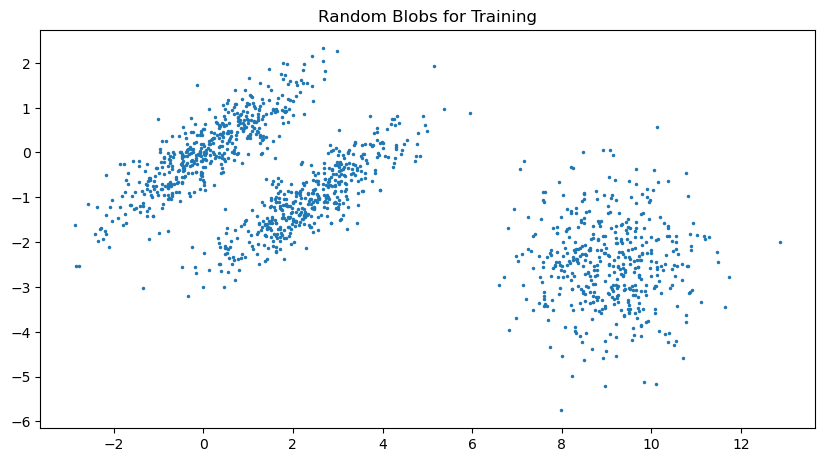

In [45]:
# 훈련 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=3)
plt.title('Random Blobs for Training')
plt.show() 

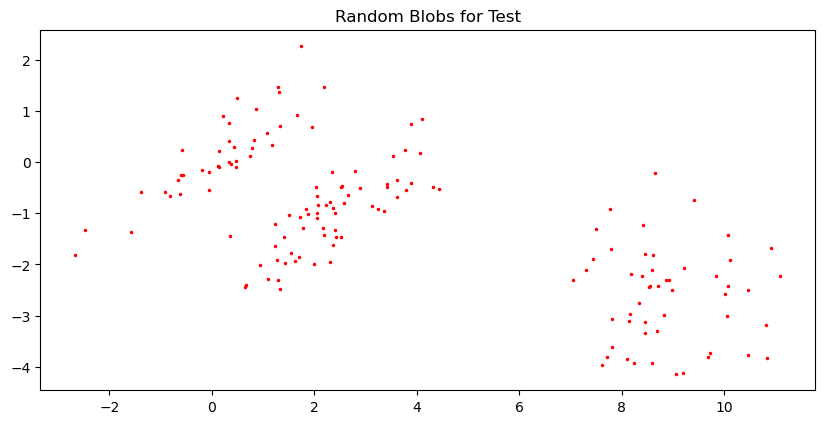

In [46]:
# 테스트 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
plt.plot(X_test[:, 0], X_test[:, 1], '.', markersize=3, color='r')
plt.title('Random Blobs for Test')
plt.show() 

## 2) GMM 모델 구현, 학습, 시각화

 - Scikit-Learn의 `GaussianMixture` 클래스를 이용하여 GMM을 생성하고 `fit` 함수를 이용하여 학습해 봅니다.  
 - GaussianMixture의 `n_components`를 이용하면 군집의 갯수를 정할 수 있습니다. 이번 실습에서는 3개로 합니다.  
 - 또한, GMM을 생성할 때 하이퍼파라메터인 `n_init`을 10으로 설정해주세요

In [47]:
gmm = GaussianMixture(n_components=3, n_init=10)# <your code> Gaussian Mixture 생성
gmm.fit(X_train)# <your code> 훈련 데이터(X_train)를 이용하여 학습

GaussianMixture(n_components=3, n_init=10)

이제 학습된 GMM 모델을 이용하여 다음 정보들을 획득할 수 있습니다.

**1. Centriods (군집 중심)**
 
**2. Density Contour (밀도 등고선)**
 
이어지는 셀들에서 이러한 정보들을 시각화합니다.

이때, GaussianMixture 클래스의 함수와 attributes를 이용합니다. 

- `GaussianMixture.means_`: returns Centroids
- `GaussianMixture.score_samples(array)`: returns log-likelihoods (for each sample)

(주의: 위의 셀에서 학습이 끝난 gmm 객체를 이후 모든 셀에서 이용합니다.)

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

**1) Centroids (군집 중심) 시각화**
- GMM 클래스로부터 군집 중심을 반환하여 시각화합니다. 

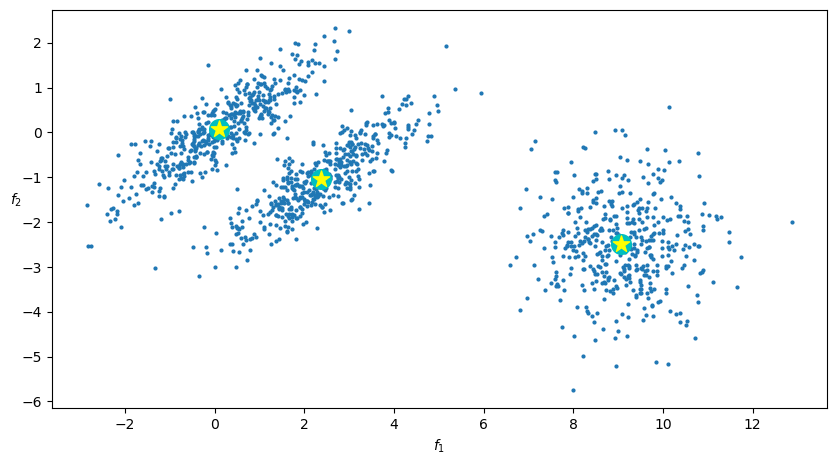

In [48]:
def visualization_centroids(gmm):
    # Centroids 시각화
    centroids = gmm.means_# <your code> to use the mean of each components to get the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, linewidths=1, color='c', zorder=10) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, linewidths=1, color='yellow', zorder=11) 

    
# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
    
# Centroids
visualization_centroids(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**2. Density Contour (밀도 등고선) 시각화**
- 밀도 등고선을 시각화하기 위해 2차원 평면공간에 촘촘한 격자점을 생성합니다.
- GMM 클래스로부터 격자점들의 위치에서의 **log-likelihoods** 를 반환하여 확률 밀도로써 사용합니다.
- matplotlib에서 지원하는 contourf 함수를 이용하여 밀도 등고선을 시각화합니다.

**주의**: GMM 클래스가 반환하는 log-likelihoods에서 likelihoods는 GMM이 가지고 있는 가우시안 분포들의 각각의 likelihoods가 아닌, 최종 가충 합으로 계산된 likelihoods 입니다.

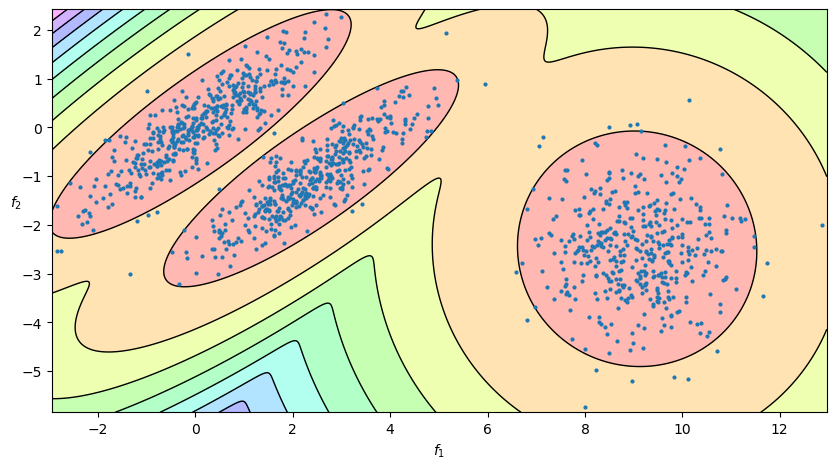

In [49]:
def visualization_contour(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # densities (log-likelihoods) 
    densities = gmm.score_samples(plane)# <your code> to compute the likelihood of each sample

    densities = np.abs(densities.reshape(x.shape))
    cntr = plt.contourf(x, y, densities, levels=10, alpha=0.3, cmap='gist_rainbow')
    plt.contour(x, y, densities, levels=10, linewidths=1, colors='k')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

## 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화

GMM을 충분히 학습시키고 나면, GMM에 포함된 각 가우시안 분포에 해당하는 Covariance matrix를 확인할 수 있습니다.

예를 들어, 현재 학습된 GMM 모델의 Covariance matrix는 다음과 같습니다.


In [50]:
covariances = gmm.covariances_
print('Covariance matrix 1\n', covariances[0],
     '\n\nCovariance matrix 2\n', covariances[1],
      '\n\nCovariance matrix 3\n', covariances[2])

Covariance matrix 1
 [[ 0.97261168 -0.02134816]
 [-0.02134816  0.94203985]] 

Covariance matrix 2
 [[1.24852372 0.82152781]
 [0.82152781 0.71693669]] 

Covariance matrix 3
 [[1.19375513 0.754545  ]
 [0.754545   0.64702411]]


앞선 셀에서 학습한 GMM의 Covariance는 아무런 제약 조건이 없지만(default), 제약 조건을 추가하여 Covariancce를 학습할 수 있습니다.

이어지는 셀에서는 GMM 모델을 생성할 때 Covariance type를 다른 type ('tied', 'diag')로 바꾸어 학습하여 클러스터의 모양이 어떻게 변하는지 확인합니다.

**Covariance type: Tied**

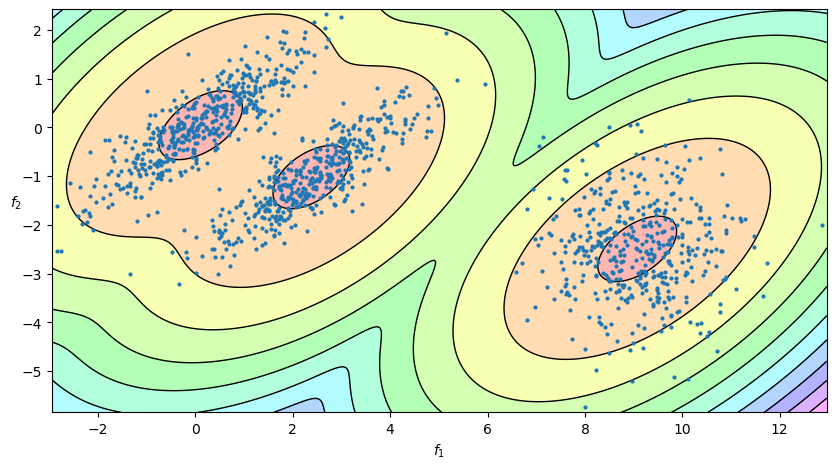

In [51]:
gmm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied')
gmm_tied.fit(X_train)

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_tied)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**Covariance type: diag**

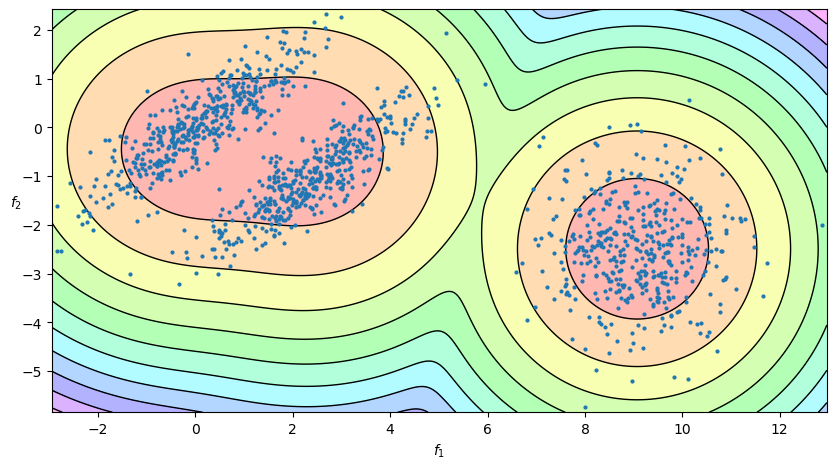

In [52]:
gmm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag')
gmm_diag.fit(X_train) 

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_diag)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

---

## 4) Discussion (각 0.5점)

**1) 모수적 밀도추정과 비모수적 밀도추정을 비교하여 설명하세요.**

[답변작성]<br/>
모수적(parametric) : 확률분포를 나타내는 파라메터가 유한한 경우, ML이나 MAP 방법으로 매개변수를 추정한다. <br/>
비모수적(non-parametric) : 확률 분포가 임의의 형태로 구성된 경우, 파젠 창이나 k 근접이웃추정 방식으로 매개변수를 추정한다.

**2) EM 알고리즘을 이용한 GMM 밀도추정 방법에 대해  설명하세요.**

[답변작성]

**3) K-means를 이용한 군집화와 GMM을 이용한 밀도추정 기반의 군집화의 차이에 대해 설명하세요.**

[답변작성] <br/>


**4) 앞서 학습된 GMM의 Covariance matrix들을 출력해보았습니다. 출력된 각 Covariance matrix (cluster1~3)의 값과 시각화한 밀도 등고선의 모양을 연결지어 설명해보세요.**

[답변작성]

---

# P6.B: 학습한 GMM (P6.A의 결과)를 이용한 새로운 샘플(Test) 분류 (3점)
### 학습목표
- 학습한 GMM 모델을 이용하여 새로운 데이터를 분류할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 학습된 GMM을 이용하여 클래스 분류 **<직접 구현>** 
- 2) 결정 경계 시각화

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.

### 점수
- 코드 작성: 3점, `#<your code>`

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## 1) 학습된 GMM을 이용하여 클래스 분류

- 새로운 샘플 (test dataset)이 어느 군집에 속해있는지 분류합니다.
- GaussianMixture.predict(array) 함수를 이용합니다.

훈련 데이터로 학습한 GMM을 새로운 샘플들 (Test dataset)에 대한 분류를 진행합니다. 

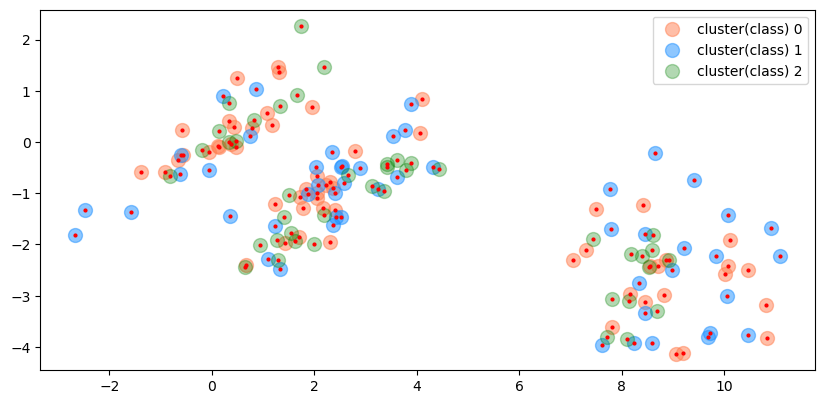

In [53]:
def classification(gmm):
    y = gmm.predict(X_train)# <your code> to get the prediction

    # 테스트 데이터에 대해 Class 분류
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 0], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 0],
                label='cluster(class) 0', marker='o', color='coral', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 1], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 1],
                label='cluster(class) 1', marker='o', color='dodgerblue', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 2], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 2],
                label='cluster(class) 2', marker='o', color='green', alpha=0.3, s=100)


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 테스트 데이터셋의 샘플 분류
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()
plt.show()

## 2) 결정 경계 시각화

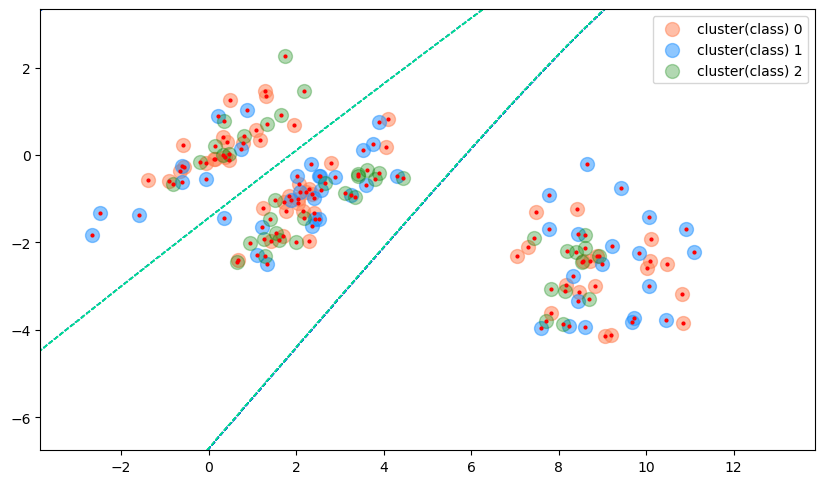

In [54]:
def visualization_decision_boundary(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # 결정 경계 시각화
    Z = gmm.predict(plane)
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, linewidths=1, cmap='winter', linestyles='dashed')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 위에서 진행한 분류 및 시각화
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()

# 결정 경계 시각화
visualization_decision_boundary(gmm)
plt.show()

# P6.C: 학습한 GMM (P6.A의 결과)를 이용한 이상치 탐지 (2점)
### 학습목표
- 학습한 GMM 모델을 이용하여 이상치 탐지를 할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 밀도 임계값 지정 **<직접 구현>**
- 2) 이상치 시각화 

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 2점, `#<your code>` 한 부분 마다 1점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

#### Outlier
![Outlier](https://miro.medium.com/max/1400/1*w5HzgB5ekxQ6Nwmx5ggn8Q.jpeg)

GMM을 이상치 탐지에 사용할 수 있습니다. 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있습니다. 예를 들어 결함 제품의 비율이 4%라고 하면 밀도 임곗값을 이 값으로 지정하여 임계 밀도보다 낮은 지역에 있는 샘플을 얻을 수 있습니다.

## 1) 밀도 임계값 지정

- **학습 데이터**의 이상치 탐지를 위해 각 샘플에 대한 확률 밀도 **(log-likelihoods)** 를 구합니다. (**GaussianMixture.score_samples()** 함수 이용)
- **np.percentile(array, n)** 함수를 이용하여 입력 array의 성분 값들 중 n percentile (n% 이하의 값에 대한 경곗값)를 반환합니다.
- 본 실습에서는 n=4 를 이용합니다.

In [55]:
densities = gmm.score_samples(X_train)# <your code> to get the densities of the trained data

# 밀도 임계값 지정
threshold = np.percentile(densities, 4)# <your code> to get 4-th percentile value

# threshold 보다 작은 확률 밀도를 가진 샘플을 이상치로 탐지
anomalies = X_train[densities < threshold]

## 2) 이상치 시각화

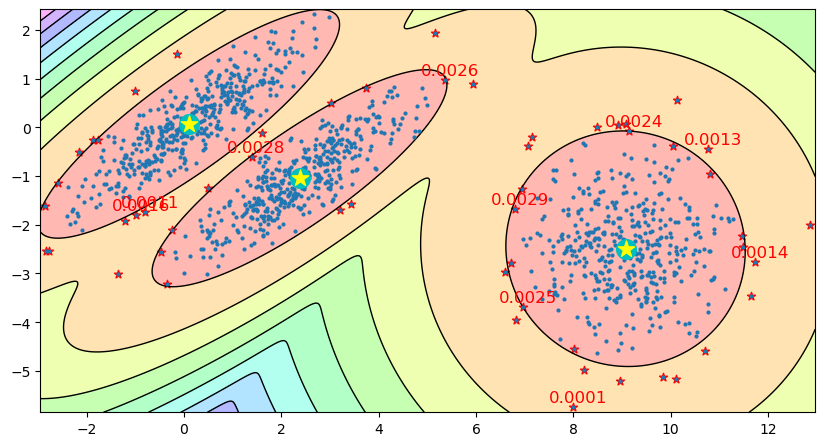

In [56]:
def visualization_likelihood(i):
    posX, posY = anomalies[i][0]-0.5, anomalies[i][1]+0.1
    likelihood = round(np.exp(gmm.score_samples(anomalies[i].reshape(1, -1)))[0].item(), 4)
    plt.text(posX, posY, f'{likelihood}', fontdict={'size': 12}, color='red')


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')


visualization_centroids(gmm)
visualization_contour(gmm)

# visualization likelihoods (10 samples)
for i in range(10):
    visualization_likelihood(i)

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()